<a href="https://colab.research.google.com/github/sureshmecad/CloudyML-AI-FOR-ALL/blob/main/seoul_bike_trip_prediction_final_without_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEOUL BIKE TRIP DURATION PREDICTION

We need to **predict the trip duration** from all the other data from dataset like **distance, location and weather information.**
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems.


# ABOUT DATASET 
Dataset contains 1 file for_modeling.csv ( 9601139 , 26 )

# COLUMNS IN THE DATASET
Unnamed: 0

Duration 

Distance

PLong

PLatd

DLong

DLatd

Haversine

Pmonth

Pday

Phour

Pmin

PDweek

Dmonth

Dday

Dhour

Dmin

DDweek

Temp

Precip

Wind

Humid

Solar

Snow

GroundTemp

Dust

### Importing required libraries


In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
 # import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dataset

In [3]:
# Read csv using pandas
train = pd.read_csv("/content/drive/MyDrive/TMLC/Seoul-Bike-Trip-Duration.zip")

In [4]:
train.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


# Identifying the number of features or columns

# Know all the names of the columns

In [5]:
# Check all the columns in the dataset
train.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

# Drop irrelevant columns from dataset

In [6]:
# Dropping irrelevant column from the dataset i.e Unnamed: 0
train.drop('Unnamed: 0', axis=1, inplace=True)

# Knows more about the data in the columns like data type it contains and total samples of each

In [7]:
# Check which columns are having categorical, numerical or boolean values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


**After checking the Dtypes of all the columns**

**object - String values**

**float64 - Numerical values**

**Observation: There are no String values so there are no categorical data**

# Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [8]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns 
train.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


# Get the total number of samples in the dataset using the len() function

In [9]:
# check length of dataset

len(train)

9601139

#Get unique values

In [10]:
# check for unique values in dataset
train.nunique()

Duration         119
Distance        3385
PLong           1497
PLatd           1504
DLong           1501
DLatd           1508
Haversine     238583
Pmonth            12
Pday              31
Phour             24
Pmin              60
PDweek             7
Dmonth            12
Dday              31
Dhour             24
Dmin              60
DDweek             7
Temp             547
Precip            60
Wind              65
Humid             89
Solar            345
Snow              42
GroundTemp       700
Dust             163
dtype: int64

# Counting the total number of missing value

In [11]:
# Check for missing values in all the columnns of the dataset
train.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There is no missing values in this dataset

#EDA

# CORRELATION MATRIX


Why ?

**A correlation matrix is a table showing correlation coefficients between variables**

There are three broad reasons for computing a correlation matrix:
1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.


In [12]:
#correlation matrix Using pandas
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Duration,1.00,0.74,-0.05,-0.00,-0.04,-0.00,0.35,-0.05,-0.01,0.13,-0.00,0.08,-0.05,-0.01,0.14,-0.01,0.08,0.13,-0.01,0.07,-0.10,0.07,-0.02,0.12,-0.02
Distance,0.74,1.00,-0.05,-0.01,-0.04,-0.01,0.58,-0.04,-0.01,0.10,-0.01,0.05,-0.04,-0.01,0.10,-0.01,0.05,0.10,-0.01,0.03,-0.03,-0.00,-0.02,0.07,-0.04
PLong,-0.05,-0.05,1.00,0.13,0.93,0.13,-0.04,-0.01,0.00,-0.01,0.00,0.00,-0.01,0.00,-0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00
PLatd,-0.00,-0.01,0.13,1.00,0.13,0.96,0.01,0.02,0.00,0.00,0.00,0.01,0.02,0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
DLong,-0.04,-0.04,0.93,0.13,1.00,0.13,-0.02,-0.01,0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
DLatd,-0.00,-0.01,0.13,0.96,0.13,1.00,0.01,0.02,0.00,0.01,0.00,0.01,0.02,0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
Haversine,0.35,0.58,-0.04,0.01,-0.02,0.01,1.00,-0.03,-0.00,0.01,-0.02,-0.00,-0.03,-0.00,0.02,0.00,-0.00,0.03,-0.01,0.00,0.01,-0.04,-0.01,0.00,-0.02
Pmonth,-0.05,-0.04,-0.01,0.02,-0.01,0.02,-0.03,1.00,-0.07,-0.02,-0.00,-0.01,1.00,-0.07,-0.02,0.00,-0.01,-0.11,-0.00,-0.18,0.02,-0.14,-0.01,-0.14,-0.08
Pday,-0.01,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.07,1.00,-0.01,0.00,0.01,-0.07,1.00,-0.01,0.00,0.01,-0.03,0.01,-0.02,-0.04,-0.00,0.05,-0.02,0.08
Phour,0.13,0.10,-0.01,0.00,-0.01,0.01,0.01,-0.02,-0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.89,-0.02,-0.01,0.17,-0.01,0.23,-0.20,-0.08,-0.02,0.09,-0.03


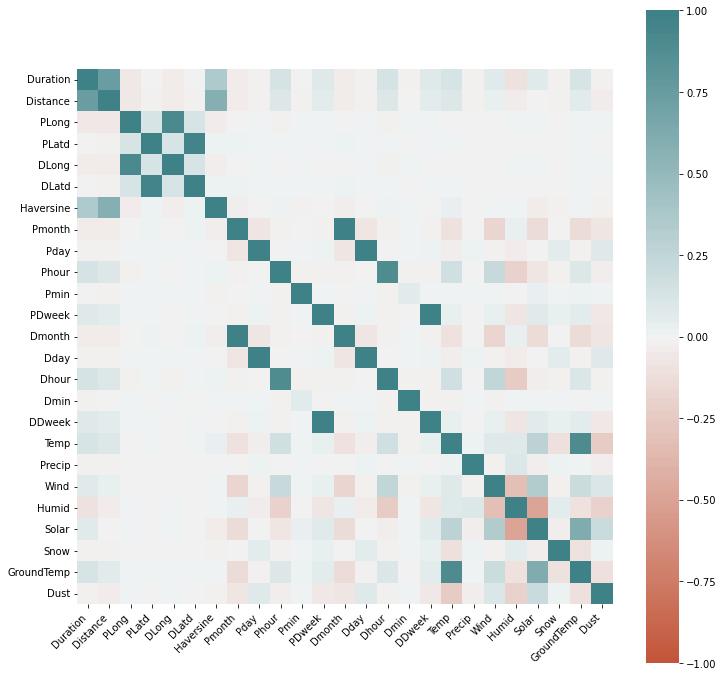

In [13]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

**Observation from above correlation mattix**
1. **distance and duration** are **strongly related**
2. **haversine and duration** and **correlated** with each other
3. **gound temperature and solar radiation** are **correlated**
4. **temperature and solar radiations** are **correlated**
5. **phour and dhour** are not related to **humidity**

# SCATTER PLOT

1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show **relationships between two numeric variables.**

In [ ]:
columns = list(train.columns)
n = len(columns)

fig, ax = plt.subplots(n*n - n, 1, figsize = (7, 100))
fig.tight_layout(pad=3.0)
idx = 0
for col1 in columns:
    for col2 in columns[1:]:
        ax[idx].plot(train[col1], train[col2], 'o')
        ax[idx].set_xlabel(col1)
        ax[idx].set_title(col2)
        idx += 1

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset

columns = list(train.columns)
columns.remove('Duration')

fig, ax = plt.subplots(len(columns), 1, figsize = (7, 100))   #a,b can be set by you

fig.tight_layout(pad=3.0)

for idx, col in enumerate(columns, 0):
    ax[idx].plot(train['Duration'], train[col], 'o')
    ax[idx].set_xlabel('Duration')
    ax[idx].set_title(col)

plt.show()

#  return scatterplot


# Loop through numerical data list and use function to scatter plot between two columns

#scatterplot(train)

# OR

# plot all pair of scatterplot by writing code for each pair

In [ ]:
columns = list(train.columns)
columns.remove('Distance')

fig, ax = plt.subplots(len(columns), 1, figsize = (7, 100))   #a,b can be set by you

fig.tight_layout(pad=3.0)

for idx, col in enumerate(columns, 0):
    ax[idx].plot(train['Duration'], train[col], 'o')
    ax[idx].set_xlabel('Duration')
    ax[idx].set_title(col)

plt.show()

**PLong and DLong** are **correlated**

**PLatd and DLatd** are **correlated**

**Pmonth and Dmonth** are **correlated**

# HISTOGRAM

1. A **histogram** is an approximate representation of the distribution of **numerical data**.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a **histogram** are: **"symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal"**.

In [ ]:
#Histogram Using pandas 
train.hist(figsize=(18, 15), legend=True);

Observation -
2. data distribution of **duration, distance, haversine, precipation, solar radiation, snow and dust** are **skewed left**.
3. data distribution of **humidity** is **symmetrical**
4. data distribution of **Pmin and Dmin** is **right skewed**.
4. data distribution of **Phour and Dhour** is **same**.
4. data distribution of **pday and Dday** is **same**.
4. data distribution of **Pmonth and Dmonth** is **same**

#VIF - Variance inflation factor
1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing **collinearity/multicollinearity.**
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train.drop(['Duration'] ,axis=1)

# target values
y = train['Duration']

# numerical values column names
names = ['Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']

In [ ]:
# droping rows with empty cells
train_for_vif.columns == names[1]

In [ ]:
# Calculating VIF for each feature.

  

there is **colinearity/multicolinearity** between variables as the VIF value is almost upto **2.5**

**Distance', 'PLong', 'PLatd', 'DLong','DLatd',  'Phour',  'PDweek', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Humid', 'Solar', 'Snow', 'GroundTemp'**,  have colinearity with all the variables.

# box plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

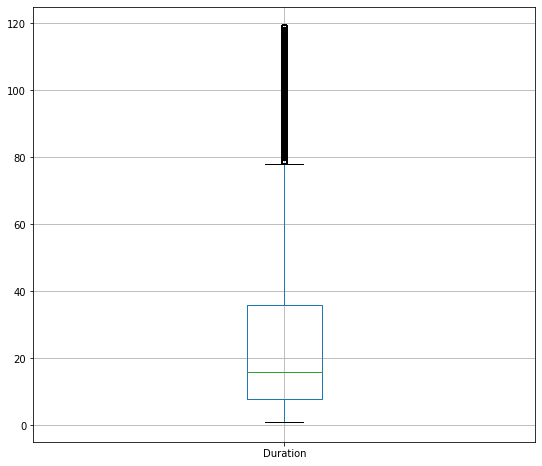

In [8]:
# Perform boxplot on Duration column of the dataset
train.boxplot(column=['Duration'], figsize=(9,8))

from above box plot graph:

duration

25% of duration have value between range 0 to 8

25% of duration have value between range 8 to 18

25% of duration have value between range 18 to 35

25% of duration have value between range 35 to 77

The mean duration is around 18

**Mostly the duration are on the lower side of the spectrum. Means small duration trips are the common trips**


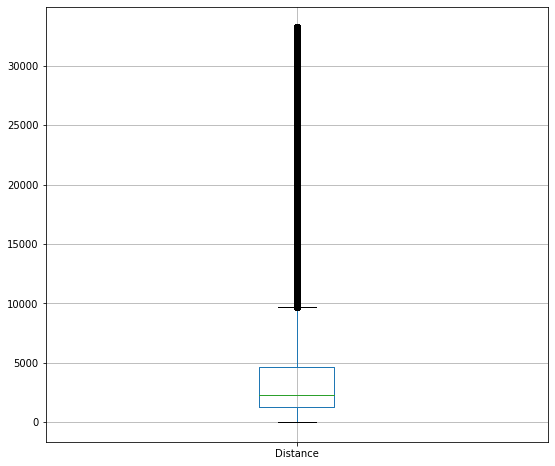

In [9]:
# Perform boxplot on Distance column of the dataset
train.boxplot(column=['Distance'], figsize=(9,8))

from above box plot graph:

distance

25% of distance have value between range 0 to 1000

25% of distance have value between range 1000 to 2500

25% of distance have value between range 2500 to 4900

25% of distance have value between range 4900 to 9900

The mean distance is around 2500

**Mostly the distance are on the lower side of the spectrum. Means small distance trips are the common trips**



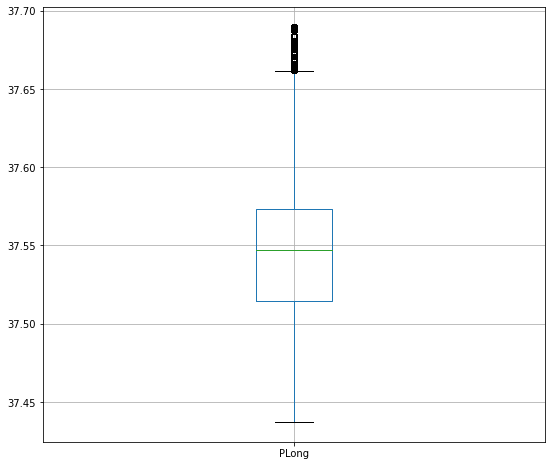

In [10]:
# Perform boxplot on PLong column of the dataset
train.boxplot(column=['PLong'], figsize=(9,8))

from above box plot graph:

PLong

25% of PLong have value between range 37.44 to 37.52

25% of PLong have value between range 37.52 to 37.559

25% of PLong have value between range 37.559 to 37.58

25% of PLong have value between range 37.58 to 37.66

The mean PLong is around 37.559

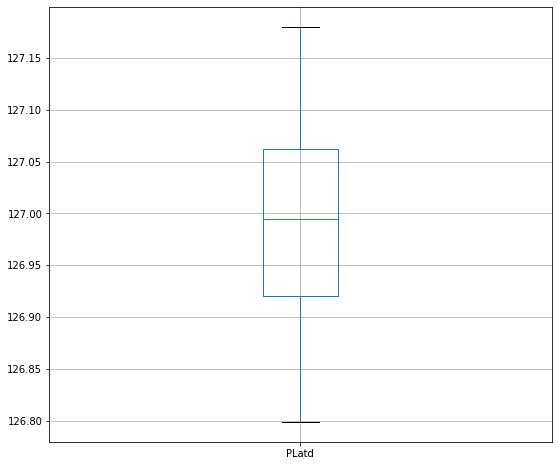

In [11]:
# Perform boxplot on PLatd column of the dataset
train.boxplot(column=['PLatd'], figsize=(9,8))

from above box plot graph:

PLatd

25% of PLatd have value between range 126.80 to 162.92

25% of PLatd have value between range 126.92 to 126.99

25% of PLatd have value between range 126.99 to 127.07

25% of PLatd have value between range 127.07 to 127.18

The mean PLatd is around 126.99

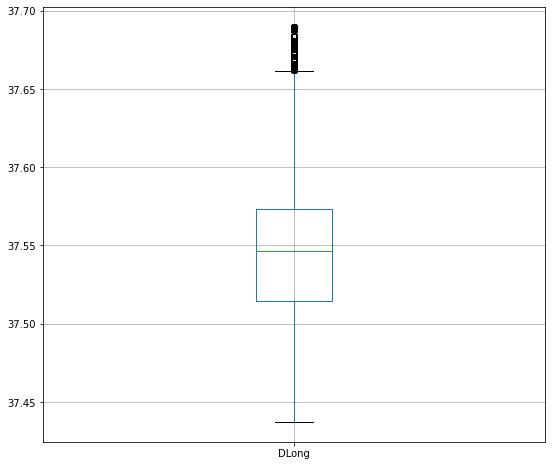

In [12]:
# Perform boxplot on DLong column of the dataset
train.boxplot(column=['DLong'], figsize=(9,8))

from above box plot graph:

DLong

25% of DLong have value between range 37.43 to 37.52

25% of DLong have value between range 37.52 to 37.545

25% of DLong have value between range 37.545 to 37.575

25% of DLong have value between range 37.575 to 37.665

The mean DLong is around 37.545

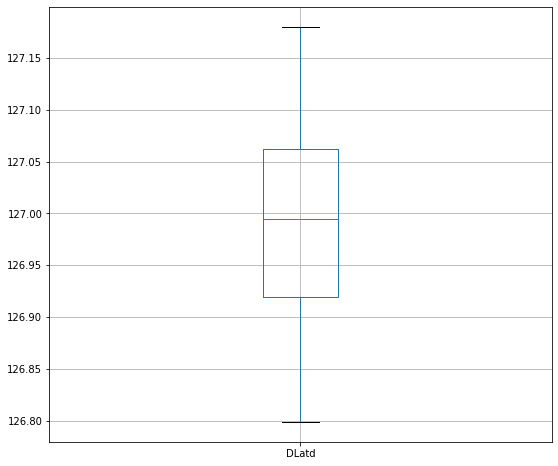

In [13]:
# Perform boxplot on DLatd column of the dataset
train.boxplot(column=['DLatd'], figsize=(9,8))

from above box plot graph:

DLatd

25% of DLatd have value between range 126.80 to 126.92

25% of DLatd have value between range 126.92 to 126.995

25% of DLatd have value between range 126.995 to 127.055

25% of DLatd have value between range 127.055 to 127.175

The mean DLatd is around 126.995

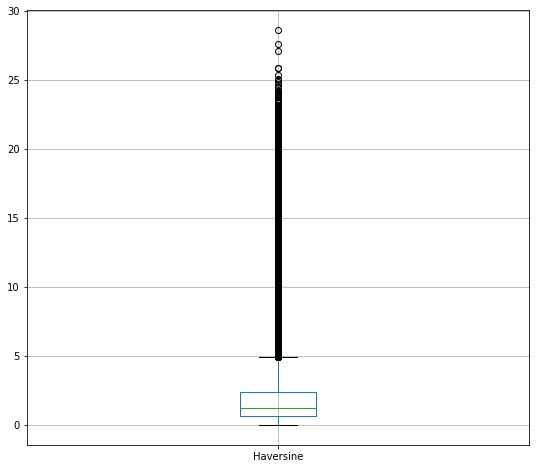

In [14]:
# Perform boxplot on Haversine column of the dataset
train.boxplot(column=['Haversine'], figsize=(9,8))

from above box plot graph:

haversine

25% of haversine have value between range 0 to 0.25

25% of haversine have value between range 0.25 to 1

25% of haversine have value between range 1 to 2.5

25% of haversine have value between range 2.5 to 5

The mean haversine is around 1

**Observation: Mostly the haversine are on the lower side of the spectrum. Means small distance trips are the common trips**

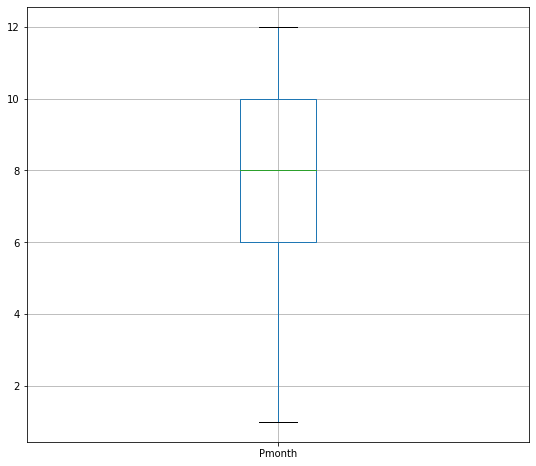

In [15]:
# Perform boxplot on Pmonth column of the dataset
train.boxplot(column=['Pmonth'], figsize=(9,8))

from above box plot graph:

Pmonth

25% of Pmonth have value between range 1 to 6

25% of Pmonth have value between range 6 to 8

25% of Pmonth have value between range 8 to 10

25% of Pmonth have value between range 10 to 12

The mean Pmonth is around 8

**more pickups are in the month which are at the end of the year**

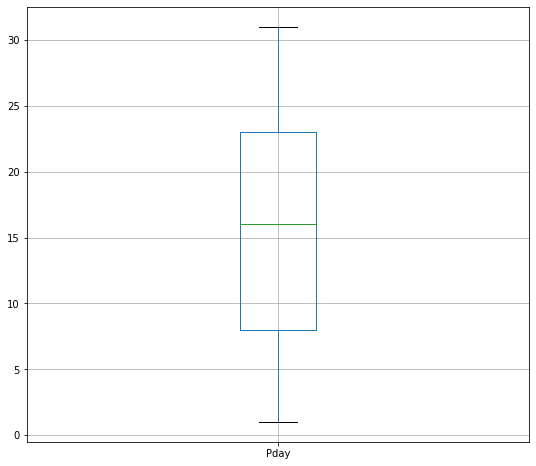

In [16]:
# Perform boxplot on Pday column of the dataset
train.boxplot(column=['Pday'], figsize=(9,8))

from above box plot graph:

Pday

25% of Pday have value between range 1 to 8

25% of Pday have value between range 8 to 16

25% of Pday have value between range 16 to 23

25% of Pday have value between range 23 to 31

The mean Pday is around 16

**pickups are almost same on every day of month**

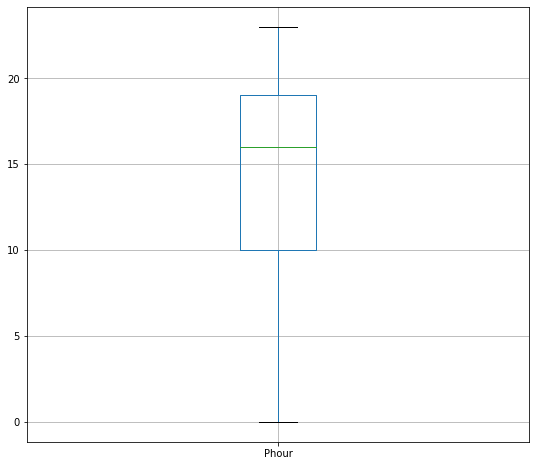

In [17]:
# Perform boxplot on Phour column of the dataset
train.boxplot(column=['Phour'], figsize=(9,8))

from above box plot graph:

Phour

25% of Phour have value between range 0 to 10

25% of Phour have value between range 10 to 16

25% of Phour have value between range 16 to 19

25% of Phour have value between range 19 to 24

The mean Phour is around 16

**more pickups are towards the end of the day**

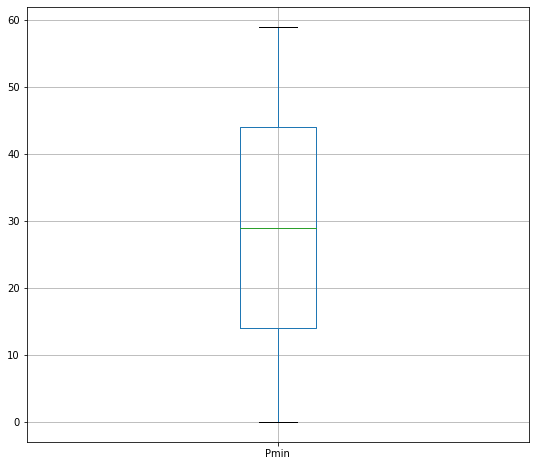

In [18]:
# Perform boxplot on Pmin column of the dataset
train.boxplot(column=['Pmin'], figsize=(9,8))

from above box plot graph:

Pmin

25% of Pmin have value between range 0 to 14

25% of Pmin have value between range 14 to 29

25% of Pmin have value between range 29 to 44

25% of Pmin have value between range 44 to 60

The mean Pmin is around 29

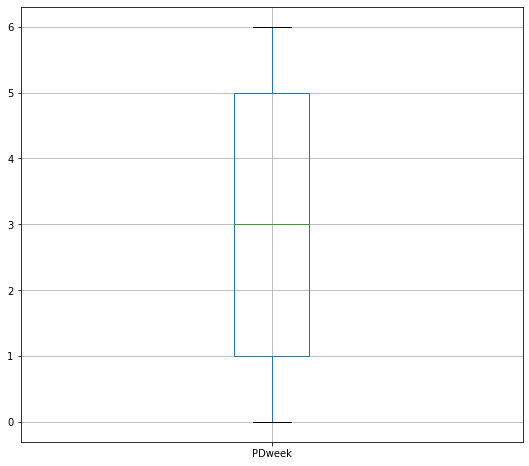

In [19]:
# Perform boxplot on PDweek column of the dataset 
train.boxplot(column=['PDweek'], figsize=(9,8))

from above box plot graph:

PDweek

25% of PDweek have value between range 0 to 1

25% of PDweek have value between range 1 to 3

25% of PDweek have value between range 3 to 5

25% of PDweek have value between range 3 to 6

The mean PDweek is around 3

**equal pickups throughout the week**

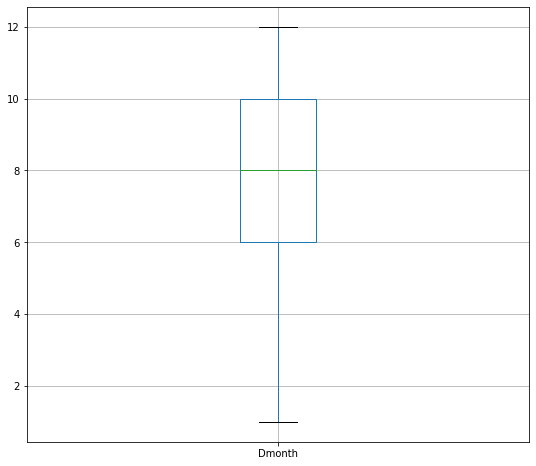

In [20]:
# Perform boxplot on Dmonth column of the dataset
train.boxplot(column=['Dmonth'], figsize=(9,8))

from above box plot graph:

Dmonth

25% of Dmonth have value between range 1 to 6

25% of Dmonth have value between range 6 to 8

25% of Dmonth have value between range 8 to 10

25% of Dmonth have value between range 10 to 12

The mean Dmonth is around 8

**more drop offs are towords the end months of the year**

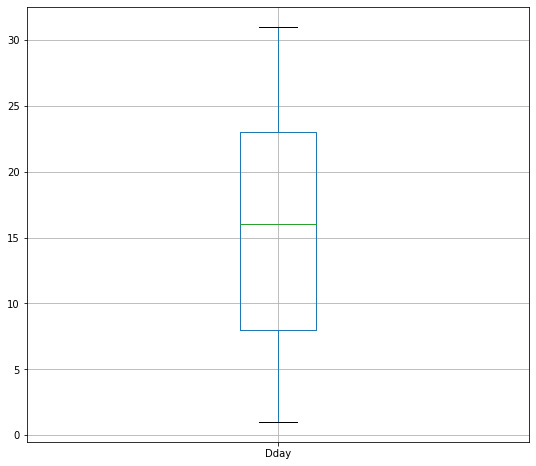

In [21]:
# Perform boxplot on Dday column of the dataset 
train.boxplot(column=['Dday'], figsize=(9,8))

from above box plot graph:

Dday

25% of Dday have value between range 1 to 8

25% of Dday have value between range 8 to 16

25% of Dday have value between range 16 to 23

25% of Dday have value between range 23 to 31

The mean Dday is around 16

**drops the equal throughout all the days of month**

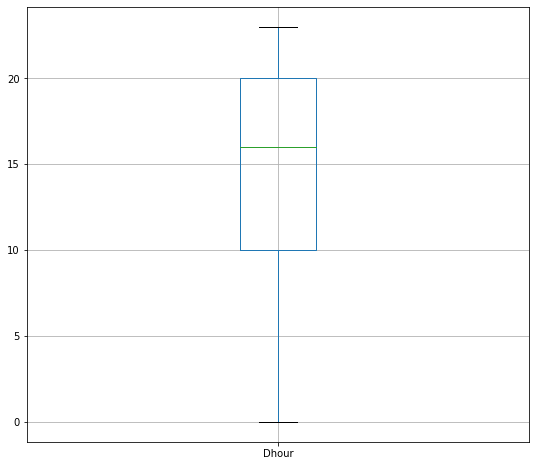

In [22]:
# Perform boxplot on Dhour column of the dataset
train.boxplot(column=['Dhour'], figsize=(9,8))

from above box plot graph:

Dhour

25% of Dhour have value between range 0 to 10

25% of Dhour have value between range 10 to 16

25% of Dhour have value between range 16 to 20

25% of Dhour have value between range 20 to 24

The mean Dhour is around 16

**drops offs are more towards the end hours of the day**

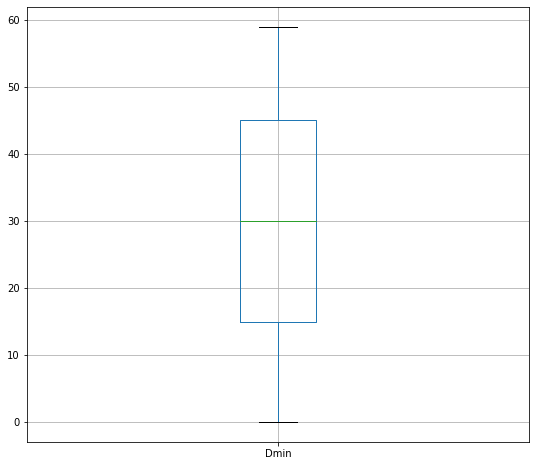

In [23]:
# Perform boxplot on Dmin column of the dataset
train.boxplot(column=['Dmin'], figsize=(9,8))

from above box plot graph:

Dmin

25% of Dmin have value between range 0 to 15

25% of Dmin have value between range 15 to 30

25% of Dmin have value between range 30 to 45

25% of Dmin have value between range 45 to 60

The mean Dmin is around 30

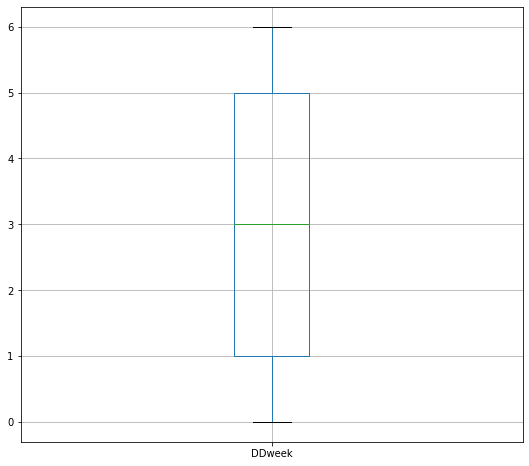

In [24]:
# Perform boxplot on DDweek column of the dataset
train.boxplot(column=['DDweek'], figsize=(9,8))

from above box plot graph:

DDweek

25% of DDweek have value between range 0 to 1

25% of DDweek have value between range 1 to 3

25% of DDweek have value between range 3 to 5

25% of DDweek have value between range 5 to 6

The mean DDweek is around 3

**drops are equal throughout the week**

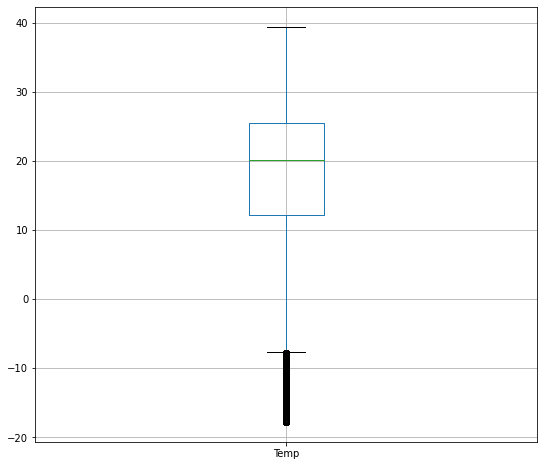

In [25]:
# Perform boxplot on Temp column of the dataset
train.boxplot(column=['Temp'], figsize=(9,8))

from above box plot graph:

temperature

25% of temperature have value between range -8 to 2

25% of temperature have value between range 2 to 20

25% of temperature have value between range 20 to 26

25% of temperature have value between range 26 to 40

The mean temperature is around 20

**trips are planned in slightly high temperature**

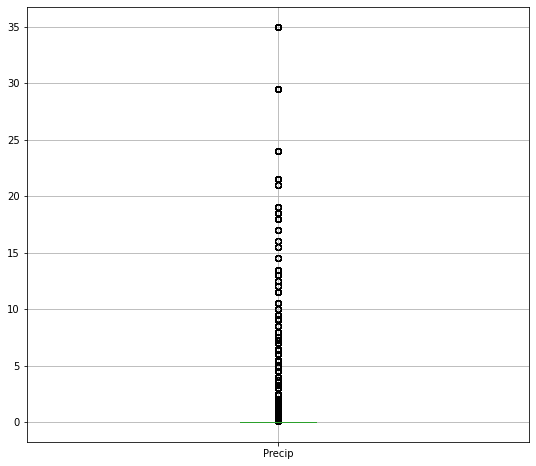

In [26]:
# Perform boxplot on Precip column of the dataset
# Using pandas 
train.boxplot(column=['Precip'], figsize=(9,8))

from above box plot graph:

precip

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

The mean precip is around 0

**more trips are planned when there is no rain or snow fall**

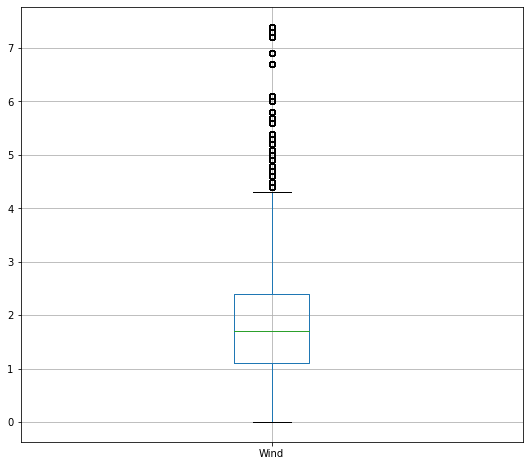

In [27]:
# Perform boxplot on Wind column of the dataset
train.boxplot(column=['Wind'], figsize=(9,8))

from above box plot graph:

wind

25% of wind have value between range 0 to 1.1

25% of wind have value between range 1.1 to 1.8

25% of wind have value between range 1.8 to 2.5

25% of wind have value between range 2.5 to 4.2

The mean wind is around 1.8

**more trips are during less windy wheather**

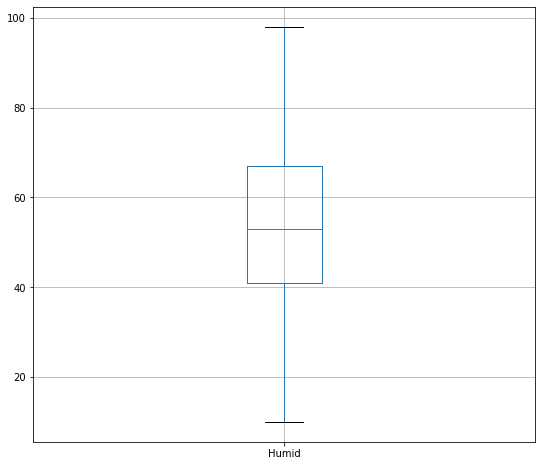

In [28]:
# Perform boxplot on Humid column of the dataset
train.boxplot(column=['Humid'], figsize=(9,8))

from above box plot graph:

humid

25% of humid have value between range 10 to 41

25% of humid have value between range 41 to 56

25% of humid have value between range 56 to 64

25% of humid have value between range 64 to 99

The mean humid is around 56

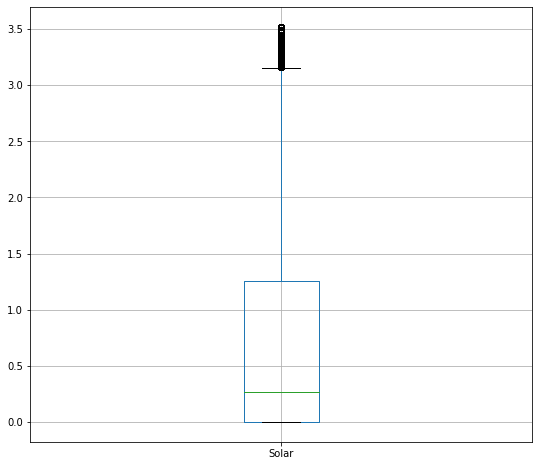

In [29]:
# Perform boxplot on Solar column of the dataset 
train.boxplot(column=['Solar'], figsize=(9,8))

from above box plot graph:

solar

25% of solar have value between range 0 to 0

25% of solar have value between range 0 to 0.25

25% of solar have value between range 0.25 to 1.25

25% of solar have value between range 1.25 to 3.1

The mean solar is around 0.25

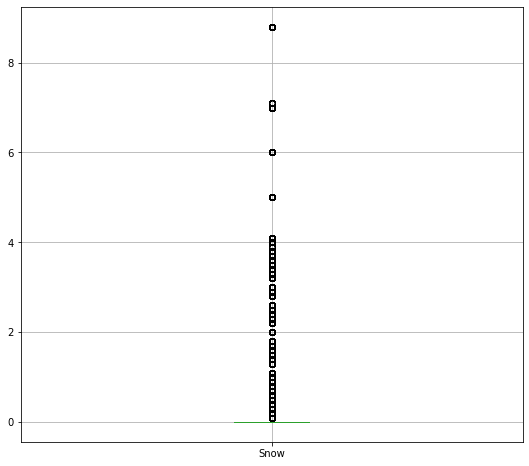

In [30]:
# Perform boxplot on Snow column of the dataset 
train.boxplot(column=['Snow'], figsize=(9,8))

from above box plot graph:

snow

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

The mean snow is around 0

**more trips are during when there is no snow fall**

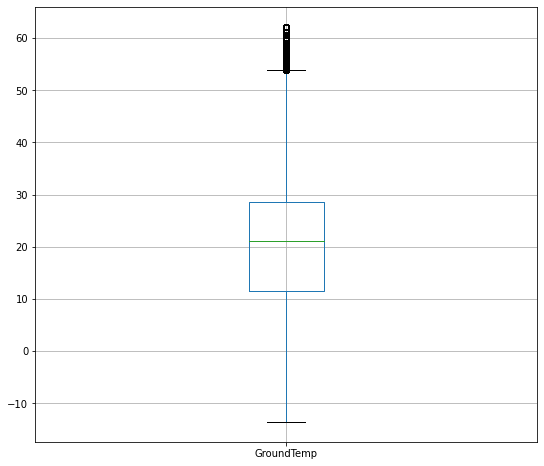

In [31]:
# Perform boxplot on GroundTemp column of the dataset
train.boxplot(column=['GroundTemp'], figsize=(9,8))

from above box plot graph:

groundtemperature

25% of groundtemperature have value between range -12 to 11

25% of groundtemperature have value between range 11 to 21

25% of groundtemperature have value between range 21 to 29

25% of groundtemperature have value between range 29 to 52

The mean groundtemperature is around 21

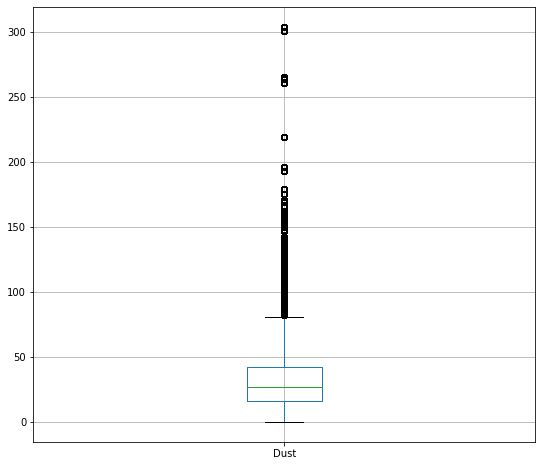

In [32]:
# Perform boxplot on Dust column of the dataset
train.boxplot(column=['Dust'], figsize=(9,8))

from above box plot graph:

dust

25% of dust have value between range 0 to 20

25% of dust have value between range 20 to 30

25% of dust have value between range 30 to 45

25% of dust have value between range 45 to 80

The mean dust is around 30

**Observation: Mostly the dust are on the lower side of the spectrum. Means people preffer to travel in less dust concentration**

# POINT PLOT


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

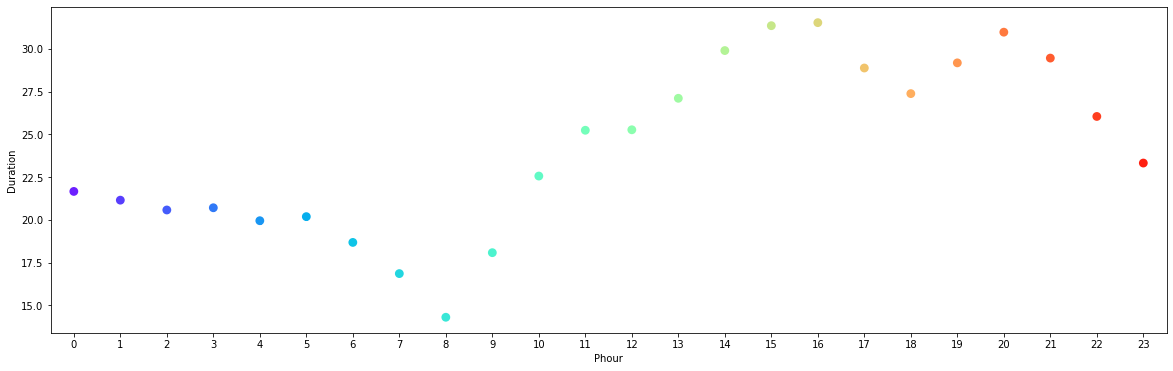

In [43]:
# Perform point plot between Phour and Duration values
plt.figure(figsize=(20,6))
sns.pointplot(x="Phour", y="Duration", data=train, palette='rainbow');

- **duration** is **more** during **morning and evening**

- after **8 duration** is **increasing** and after **20** its again **decreasing**

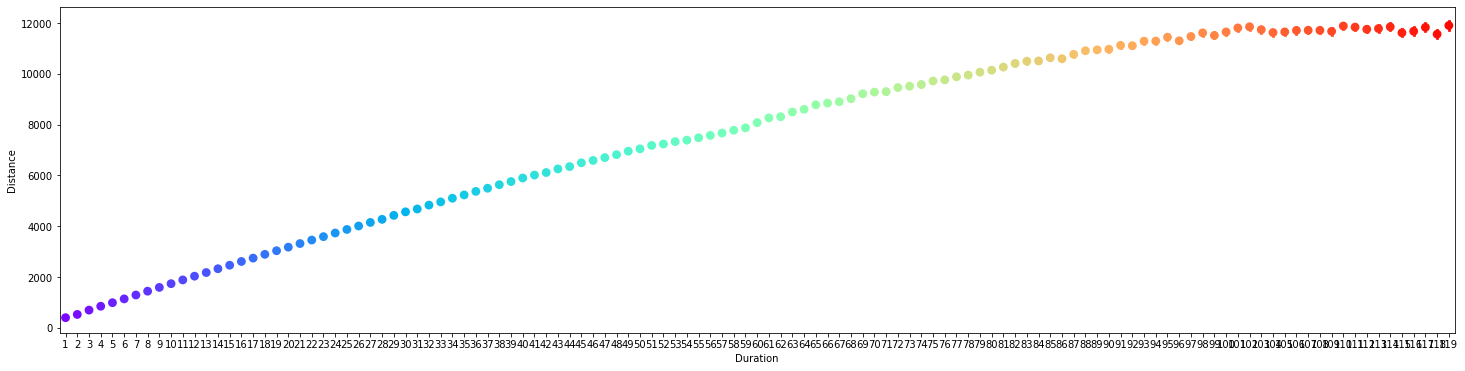

In [46]:
# Perform point plot between Distance and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Distance", data=train, palette='rainbow');

- **duration and distance** have a **positive correlation** between them

- as **duration increases distance also increases**

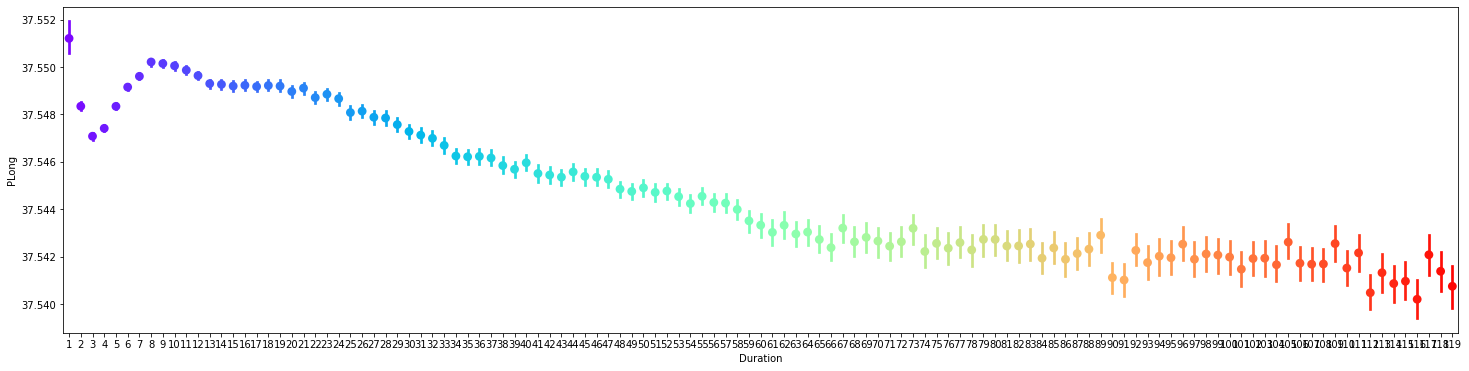

In [47]:
# Perform point plot between PLong and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="PLong", data=train, palette='rainbow');

- as **duration increases pickup longitude decreases**

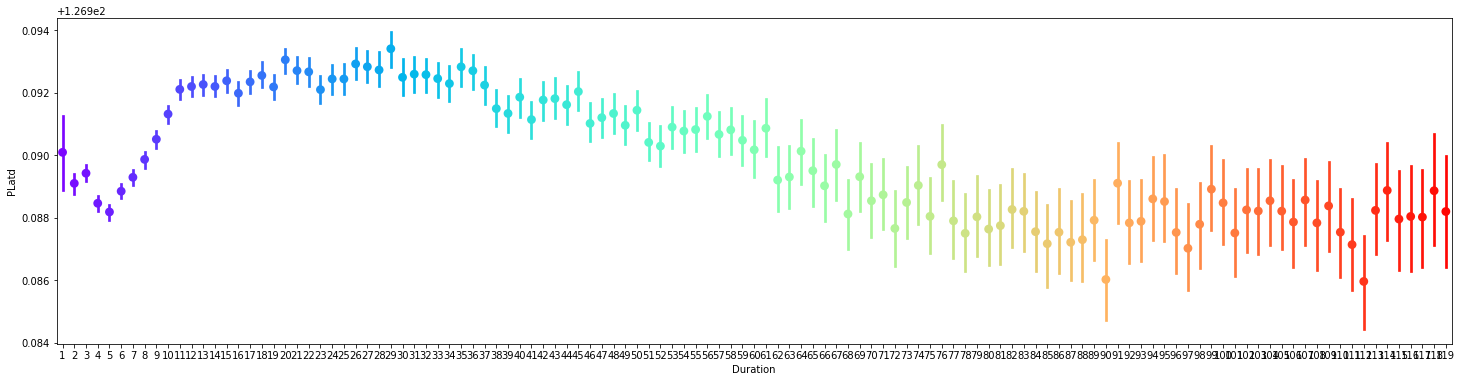

In [48]:
# Perform point plot between PLatd and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="PLatd", data=train, palette='rainbow');

- **duration and PLatd** has **negative correlation** between them.

- as the value of **duration increases** value of **PLatd decreases**

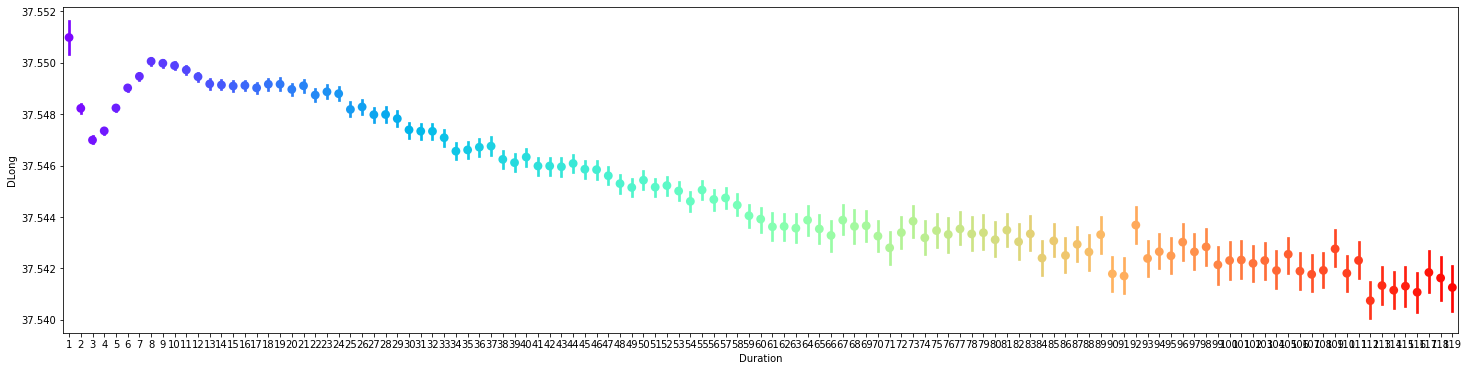

In [49]:
# Perform point plot between DLong and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="DLong", data=train, palette='rainbow');

- **duration and DLong** has **negative correlation** between them.

- as the value of **duration increases** value of **DLong decreases**

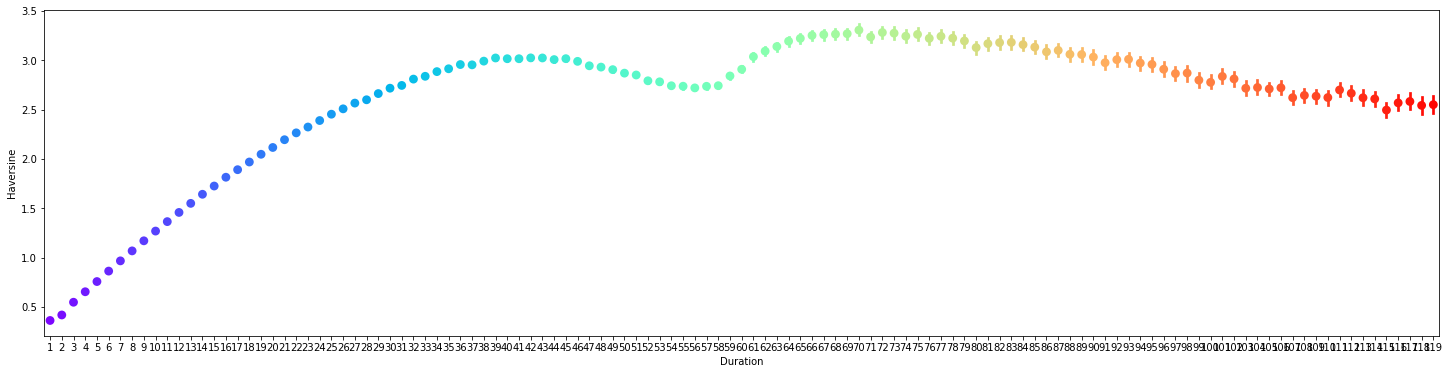

In [50]:
# Perform point plot between Haversine and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Haversine", data=train, palette='rainbow');

- **duration and haversine** are **correlated** 

- they have **positive correlation** between them

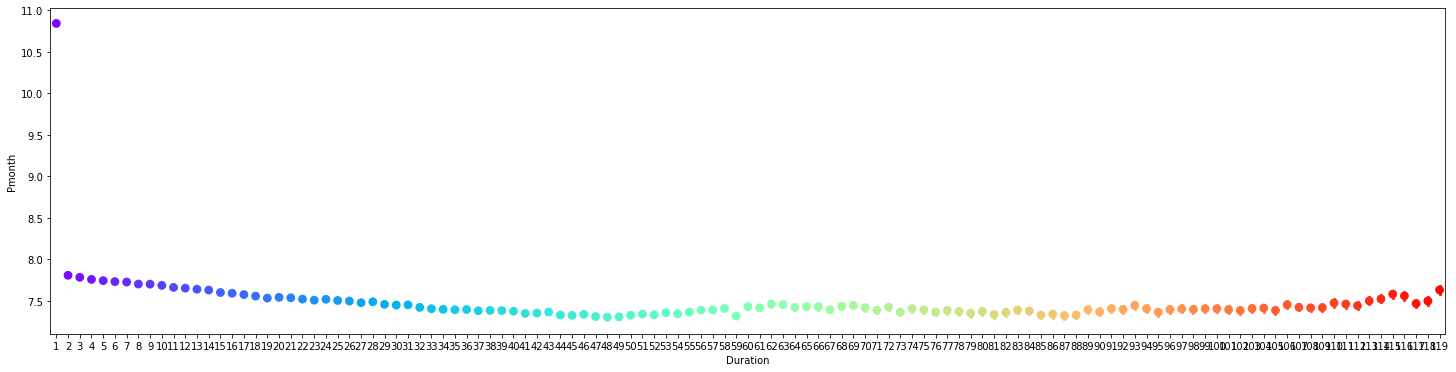

In [51]:
# Perform point plot between Pmonth and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Pmonth", data=train, palette='rainbow');

- **pmonth and duration** are **positively correlated**

- as the value of **duration increases** value of **Pmonth also increases**

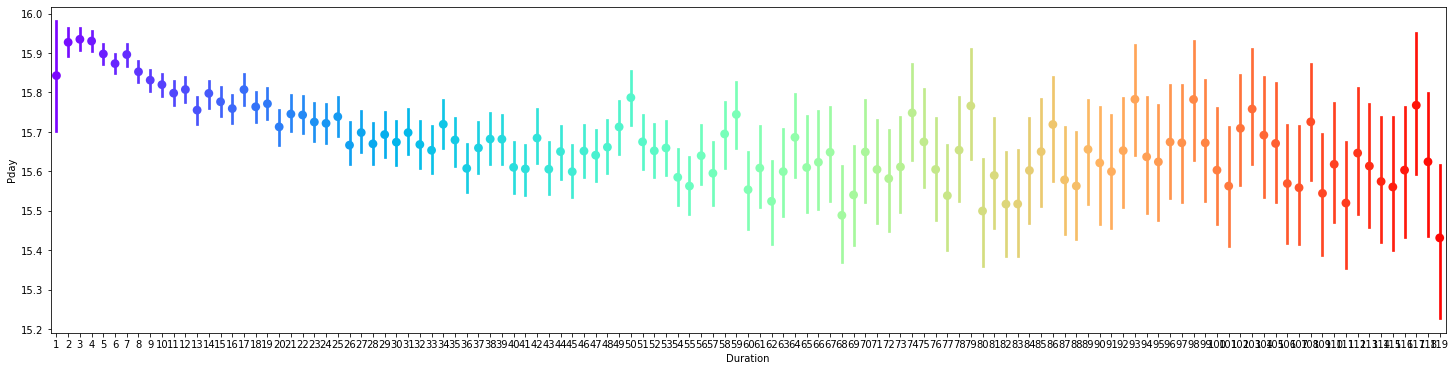

In [52]:
# Perform point plot between Pday and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Pday", data=train, palette='rainbow');

- most of the points are between **14.0 and 15.0**

- very few are above **15,0 and below 14.0**

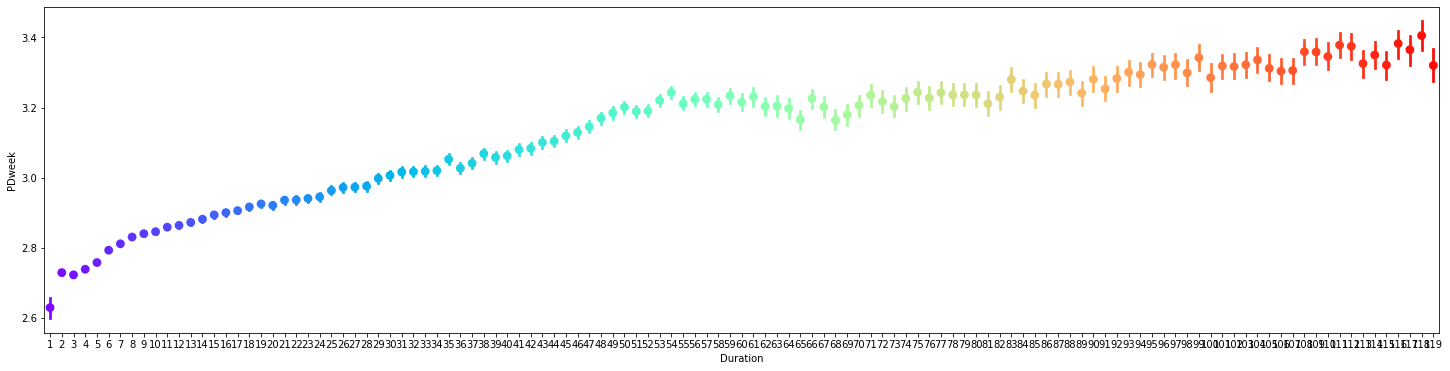

In [53]:
# Perform point plot between PDweek and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="PDweek", data=train, palette='rainbow');

- **Duration** has a **positive correlation** with **PDweek**

- as the value of **duration increasing** value of **PDweek is also increasing**

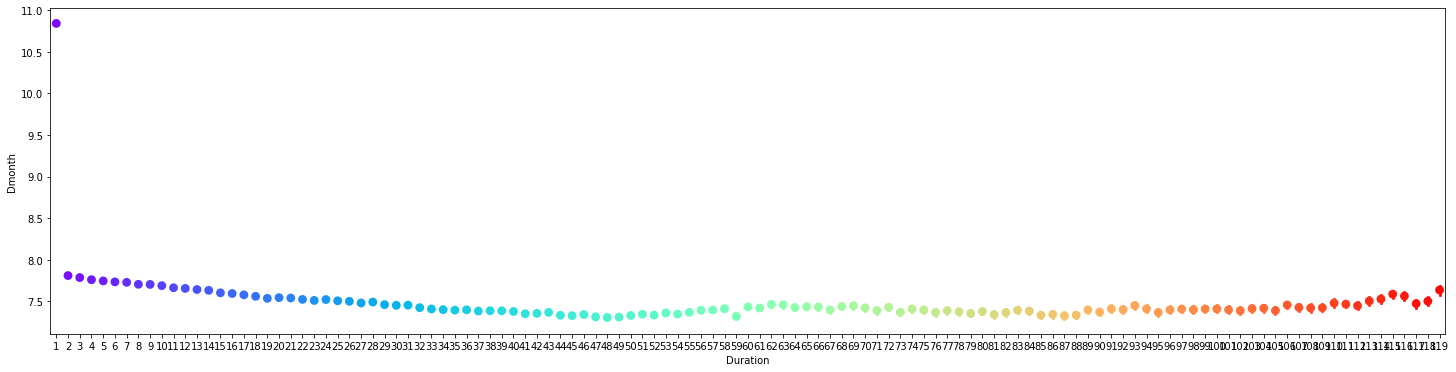

In [54]:
# Perform point plot between Dmonth and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Dmonth", data=train, palette='rainbow');

- all values are between **7.5 and 7.8**

- there is **no relation** between **Dmonth and Duration**

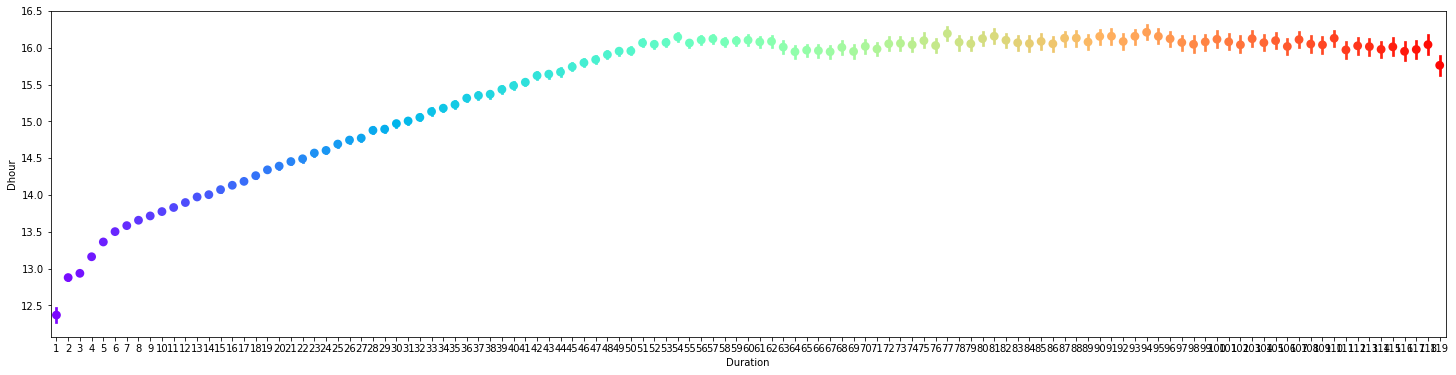

In [55]:
# Perform point plot between Dhour and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Dhour", data=train, palette='rainbow');

- there is a **positive relation** between **duration and Dhour** 

- as the value of **duration increases** value of **Dhour also increases**

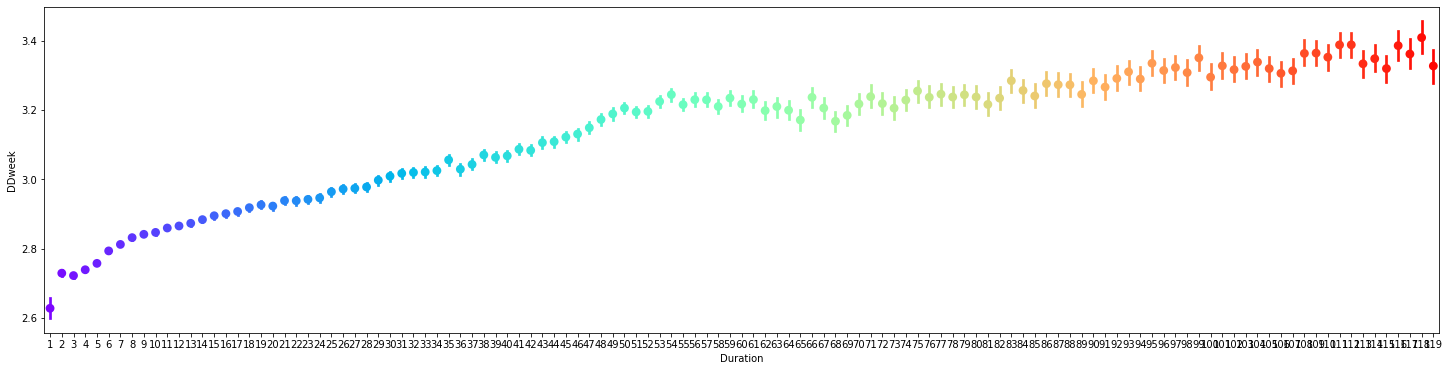

In [56]:
# Perform point plot between DDweek and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="DDweek", data=train, palette='rainbow');

- there is **increase in DDweek** when there is **increase in duration**

- they are **correlated to each other**

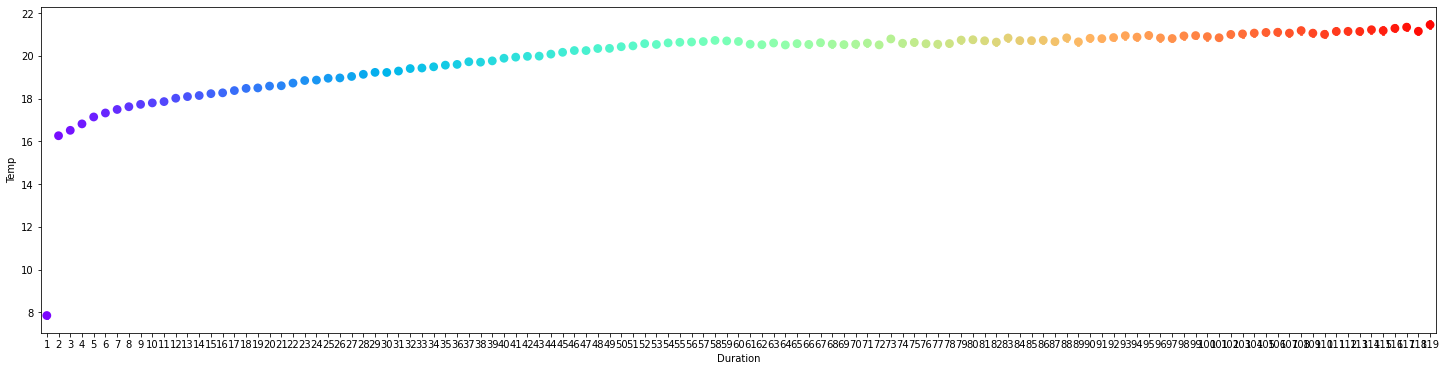

In [57]:
# Perform point plot between Temp and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Temp", data=train, palette='rainbow');

- **duration and templerature** have a **positive relation** between them


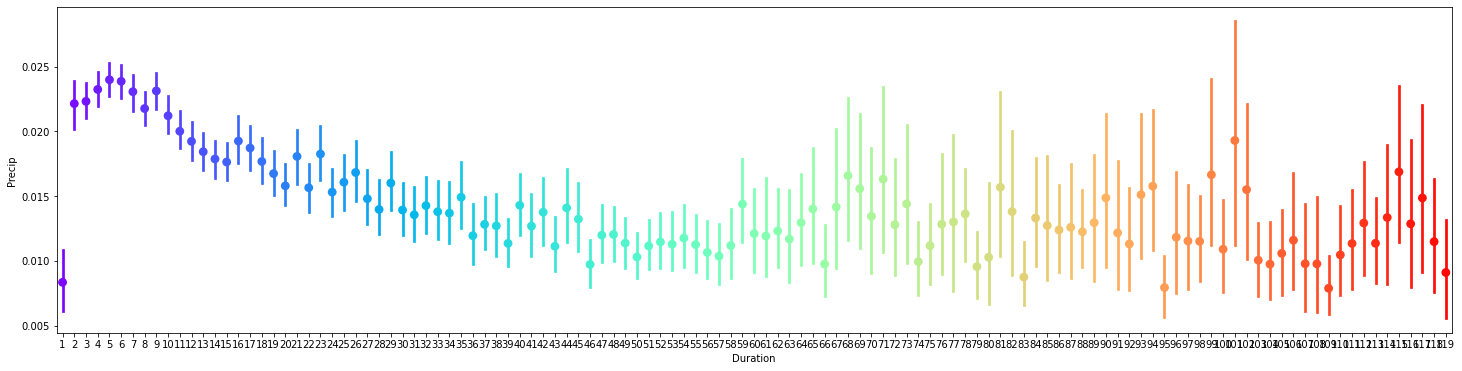

In [58]:
# Perform point plot between Precip and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Precip", data=train, palette='rainbow');

- most of the values are **between 0.0 and 0.01**

- **very few** values are **above 0.01**

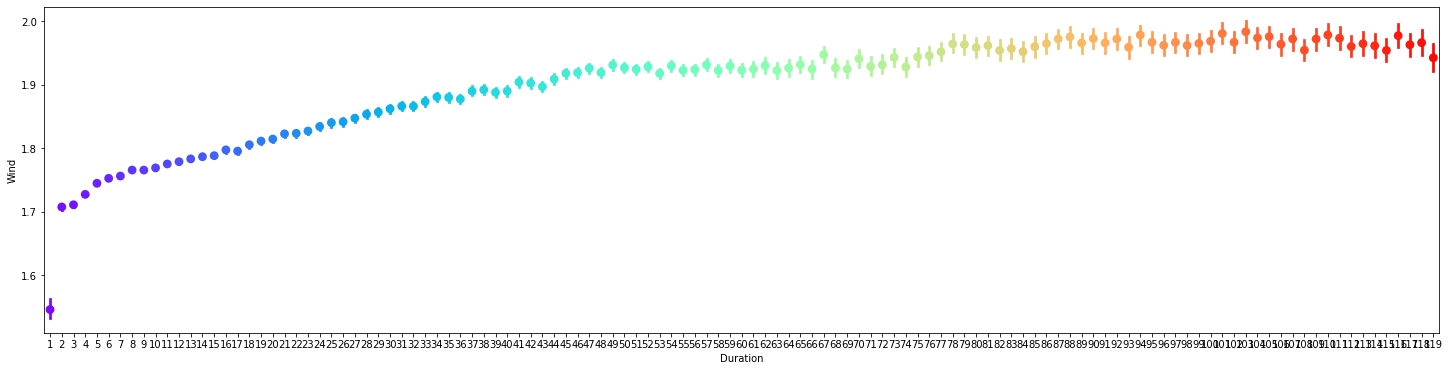

In [59]:
# Perform point plot between Wind and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Wind", data=train, palette='rainbow');

- **duration and wind** are **correlated** 

- as the value of **duration increases** value of **wind is also increasing**

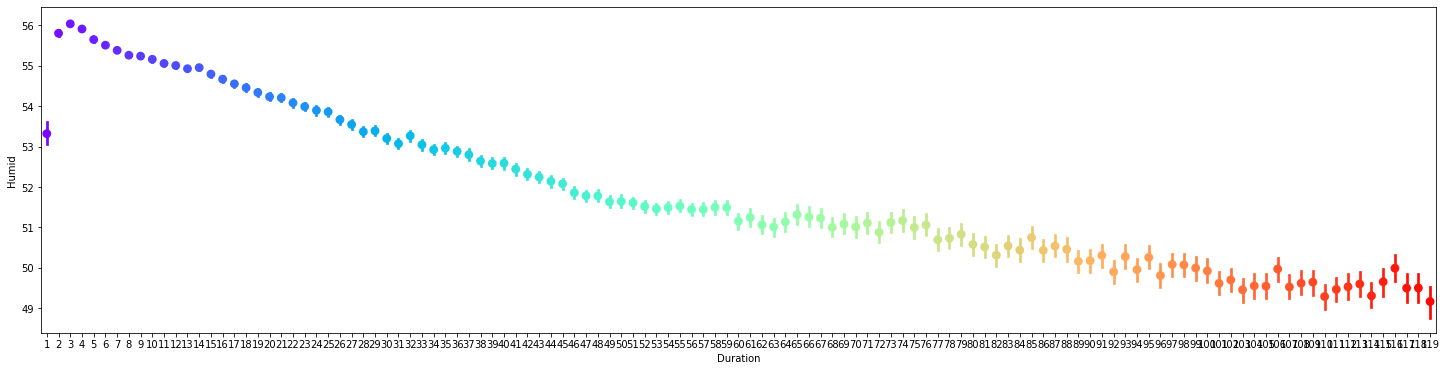

In [60]:
# Perform point plot between Humid and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Humid", data=train, palette='rainbow');

- **duration and humidity** are **negatively correlated** 

- as the value of **duration** is increasing value of **humidity decreases**

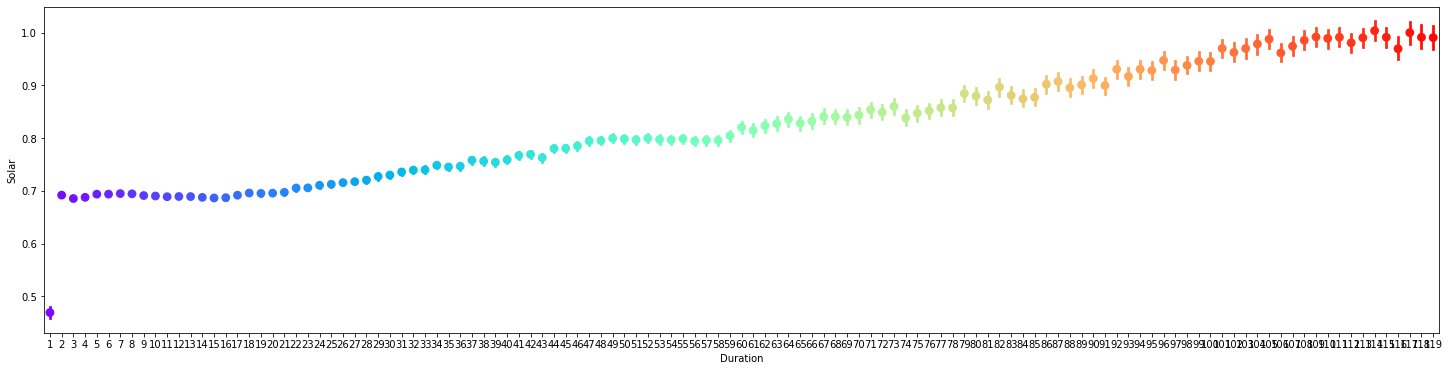

In [61]:
# Perform point plot between Solar and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Solar", data=train, palette='rainbow');

- as the value of **duration is increasing** value of **solar radiations** is also **increasing**

- they are **correlated to each other**

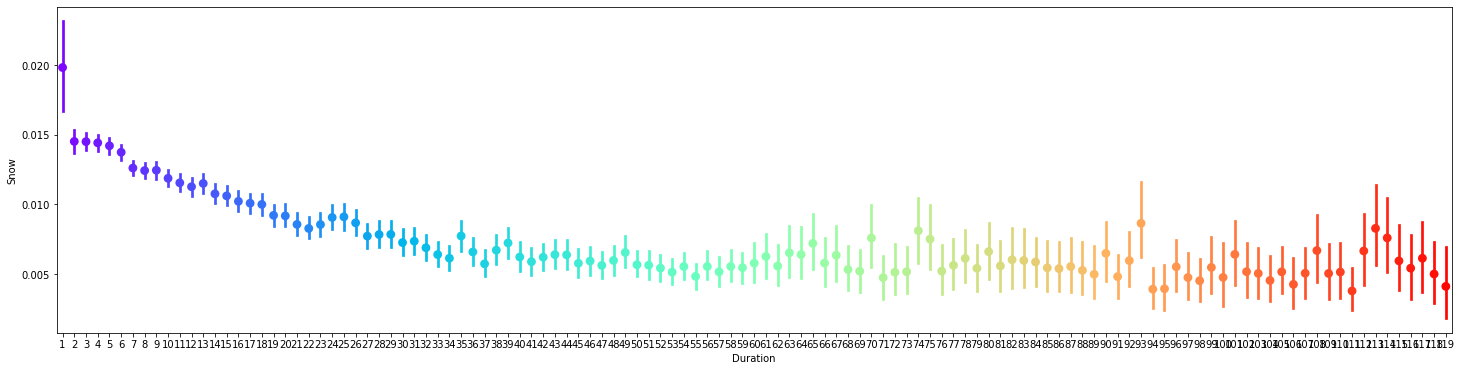

In [62]:
# Perform point plot between Snow and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Snow", data=train, palette='rainbow');

- **snow and duration** are **correlated** 

- they have **negative relation between them**

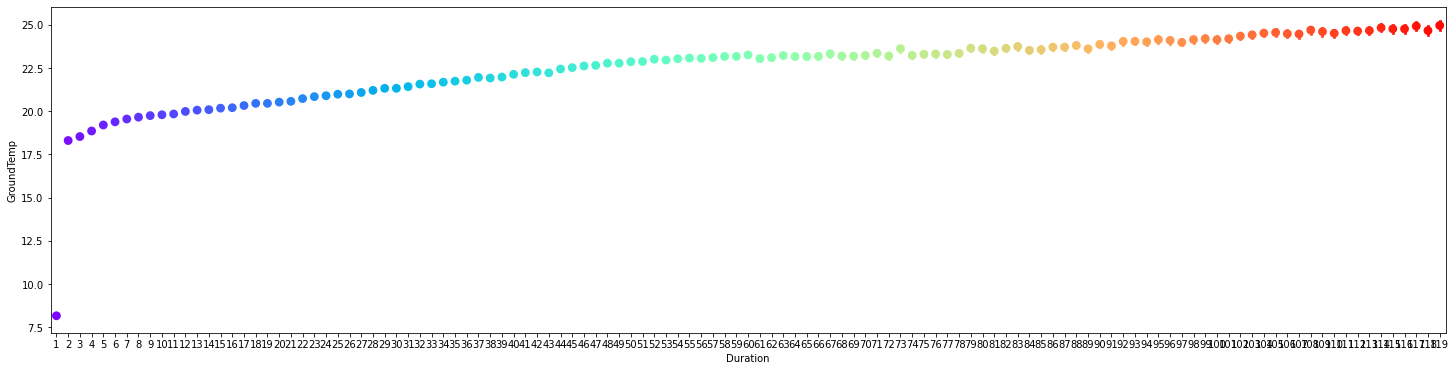

In [63]:
# Perform point plot between GroundTemp and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="GroundTemp", data=train, palette='rainbow');

- **ground temperature and duration** are **correlated to each other.**

- as the value of **duration increases** value of **ground temperature also increases**

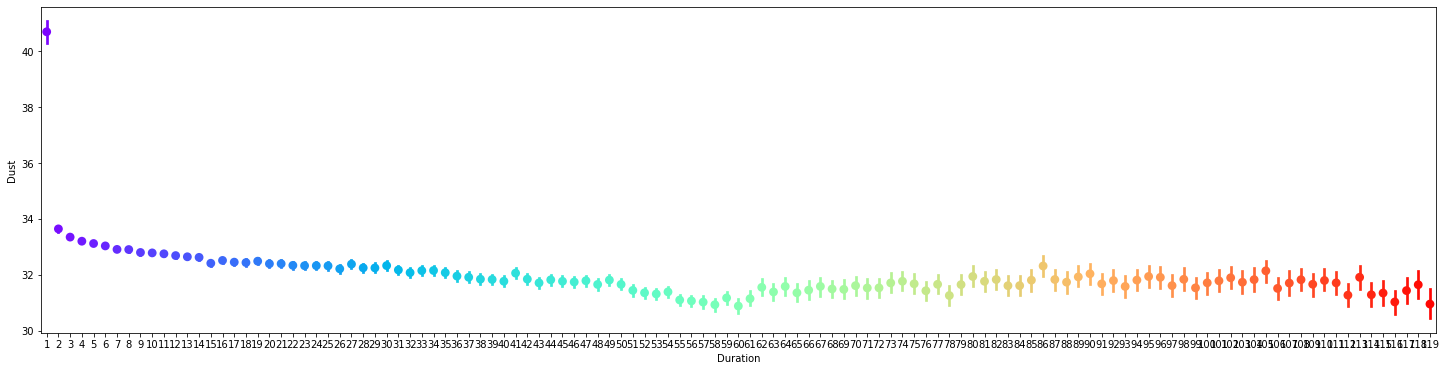

In [64]:
# Perform point plot between Dust and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Duration", y="Dust", data=train, palette='rainbow');

- **dust and duration** are **correlated** to each other.

- as the value of **duration increases** value of **dust also increases**

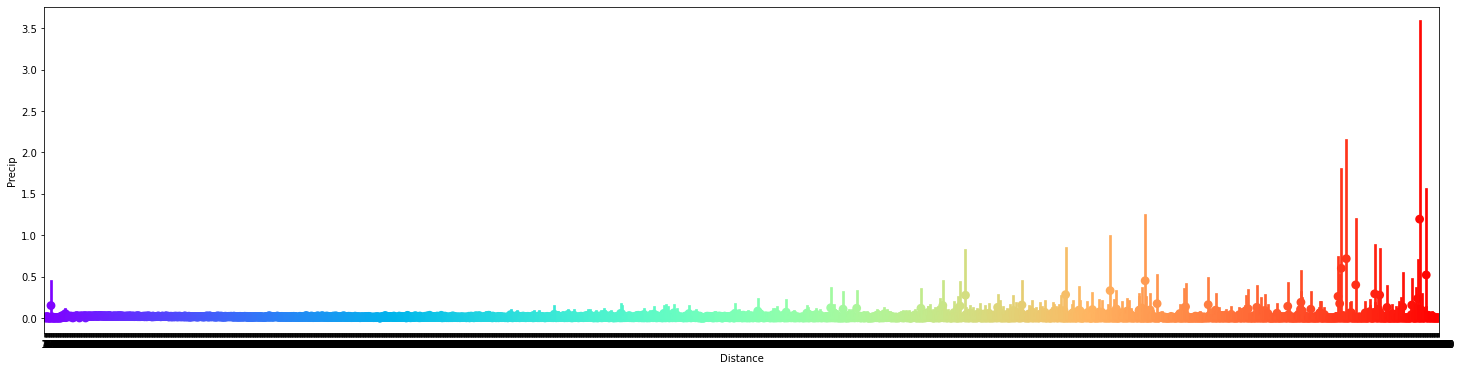

In [66]:
# Perform point plot between Precip and Distance values 
plt.figure(figsize=(25,6))
sns.pointplot(x="Distance", y="Precip", data=train, palette='rainbow');

- all the values are **around 0.00**

- very few are **above 0.00**

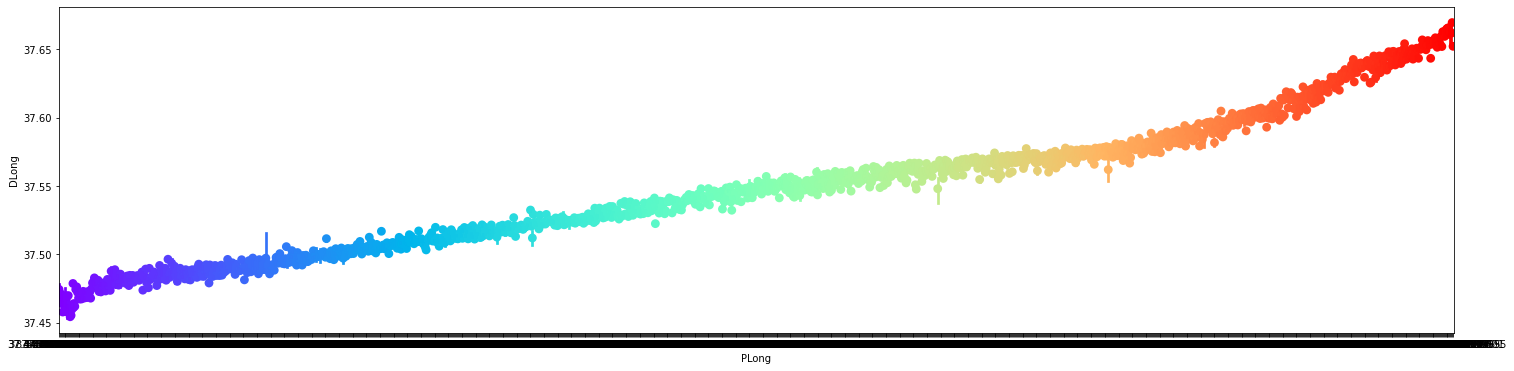

In [67]:
# Perform point plot between PLong and Dlong values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="DLong", data=train, palette='rainbow');

- **Plong and Dlong are corelated**

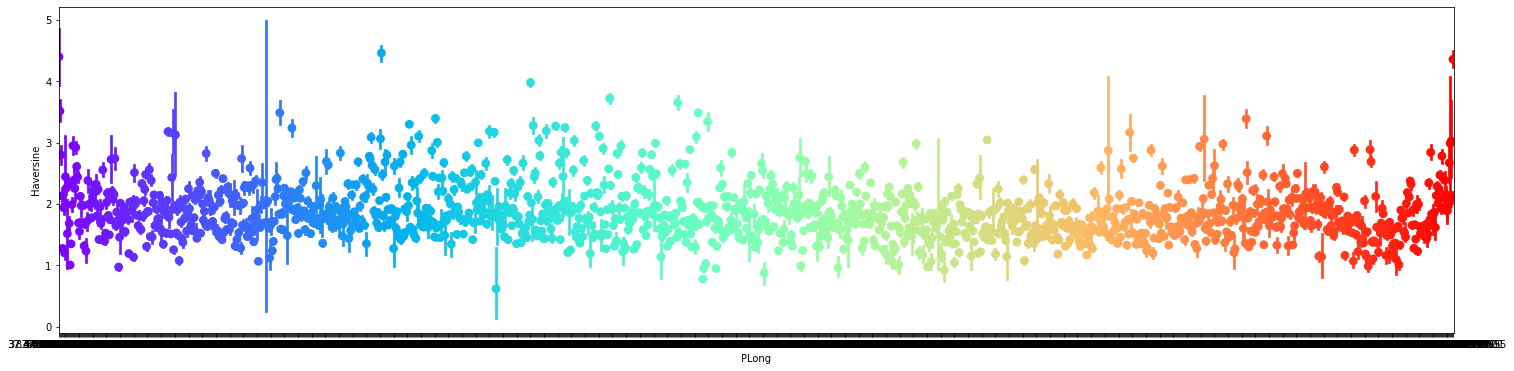

In [68]:
# Perform point plot between PLong and Haversine values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Haversine", data=train, palette='rainbow');

- all the values are **between 1 and 3**

- very few are **above 3 and below 1**

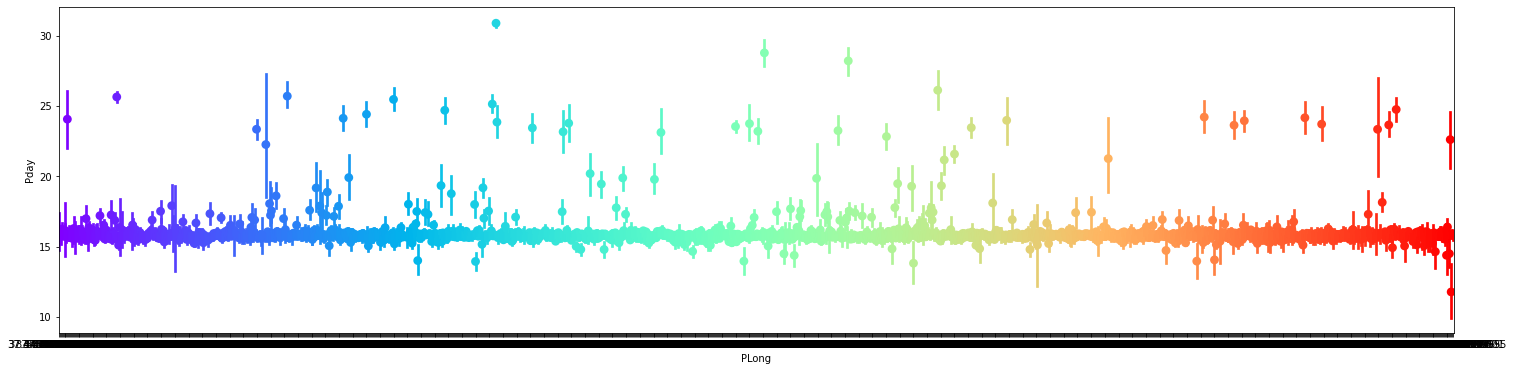

In [69]:
# Perform point plot between PLong and Pday values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Pday", data=train, palette='rainbow');

- all the values are **between 12.5 to 17.5**

- very few are **above 17.5 and below 12.5**

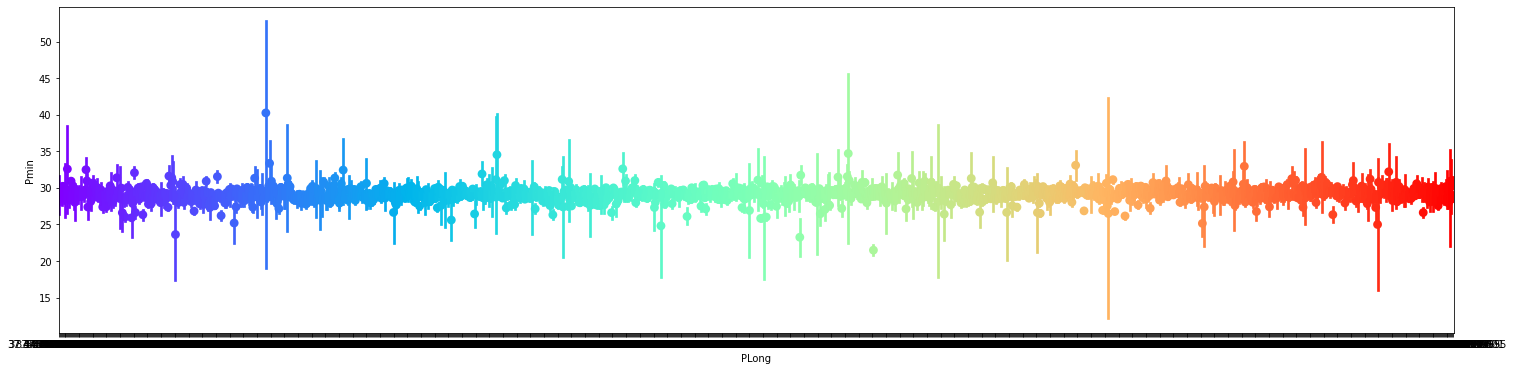

In [70]:
# Perform point plot between PLong and Pmin values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Pmin", data=train, palette='rainbow');

- all the values are **between 25 to 35**

- very few are **above and below of this range**

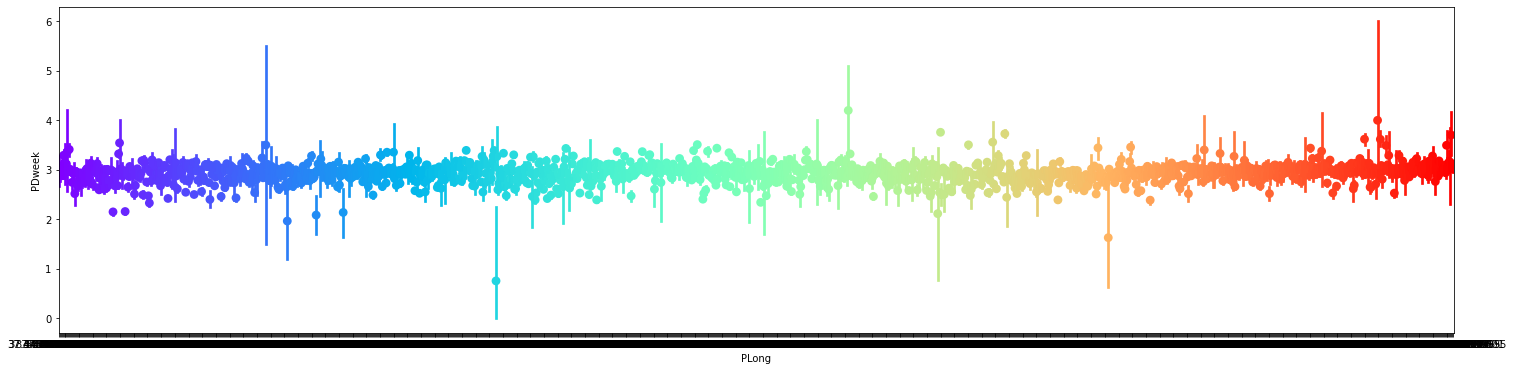

In [71]:
# Perform point plot between PLong and PDweek values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="PDweek", data=train, palette='rainbow');

- all the values are **between 2 to 4**

- very few are **above and below of this range**

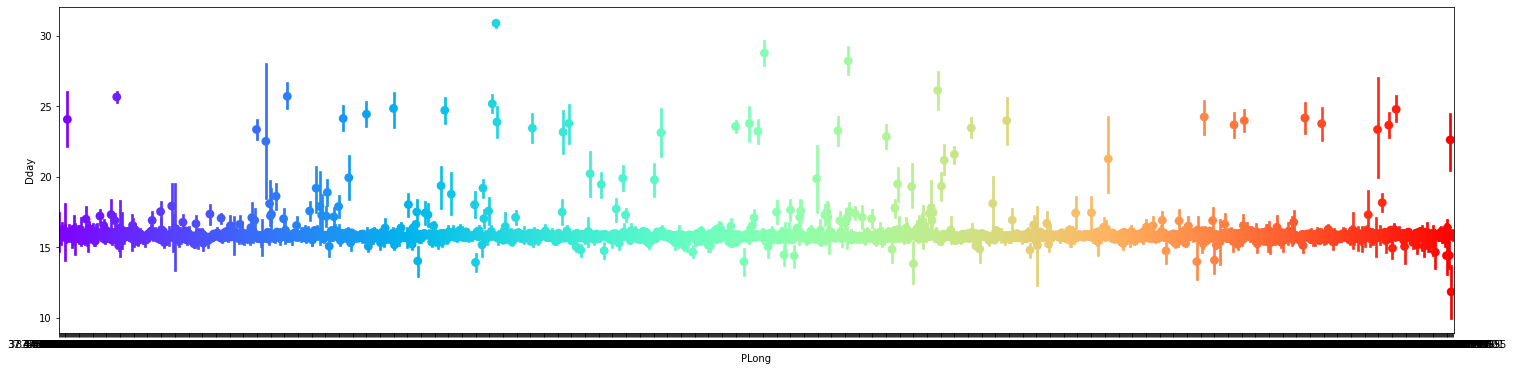

In [72]:
# Perform point plot between PLong and Dday values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Dday", data=train, palette='rainbow');

- all the values are **between 12 to 17**

- very few are **above and below of this range**

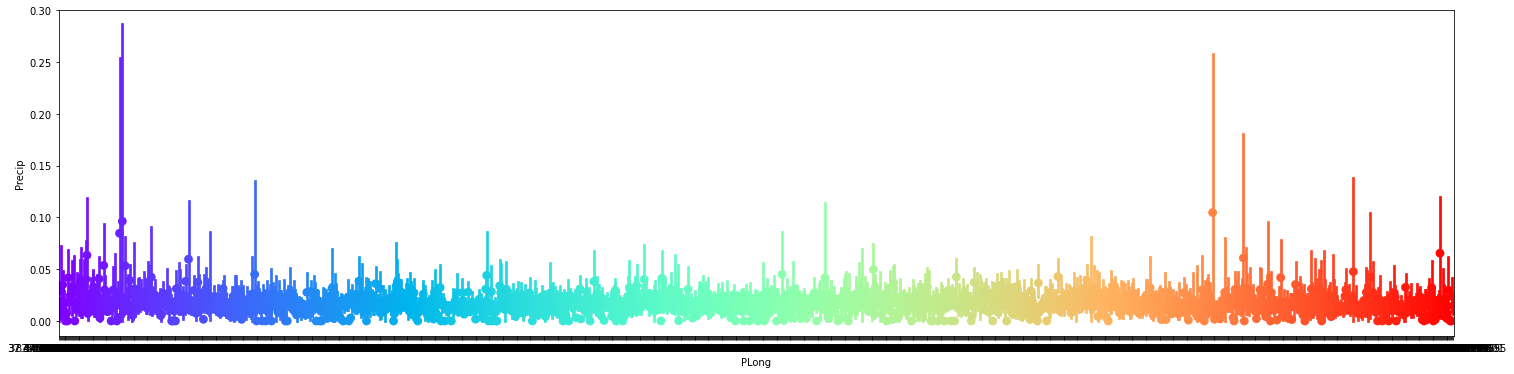

In [73]:
# Perform point plot between PLong and Precip values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Precip", data=train, palette='rainbow');

- all values are **around 0.00** 

- very few are **above 0.00**

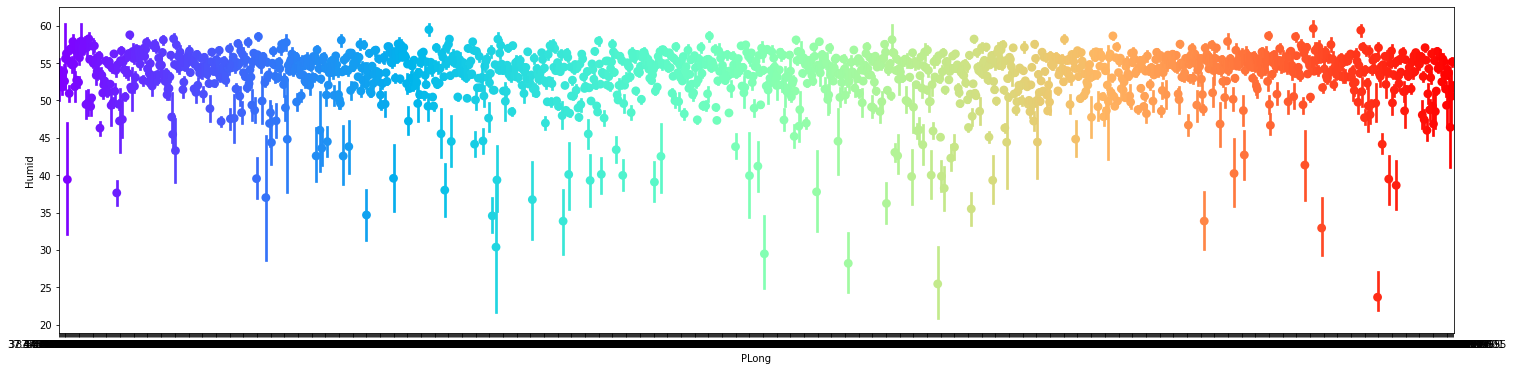

In [74]:
# Perform point plot between PLong and Humid values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLong", y="Humid", data=train, palette='rainbow');

- as the distribution value of **PLong is increasing** the value of distribution of **humidity is same**

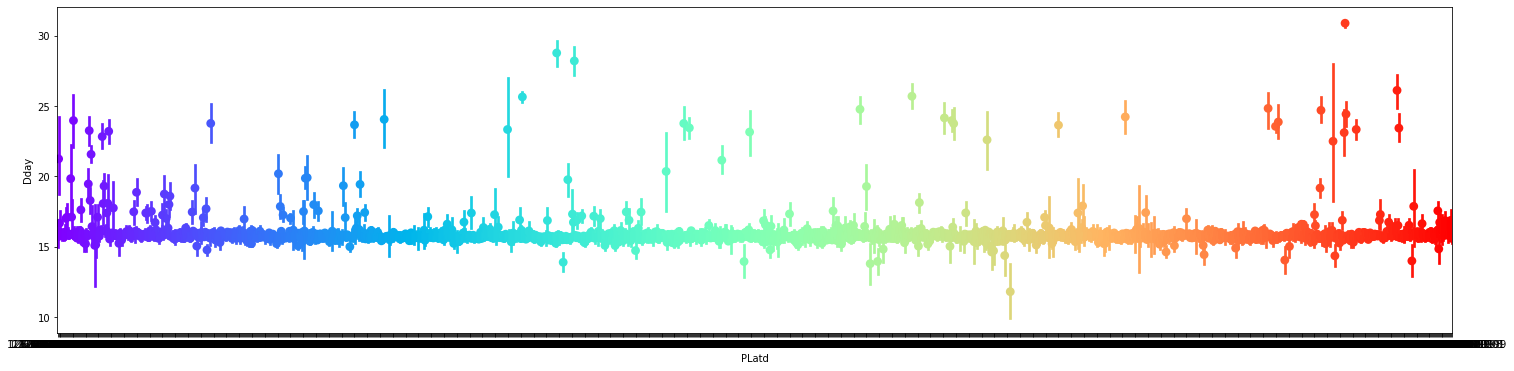

In [75]:
# Perform point plot between PLatd and Dday values 
plt.figure(figsize=(25,6))
sns.pointplot(x="PLatd", y="Dday", data=train, palette='rainbow');

- all valies are **around 15**

- very few are **above and below of 15**

# COUNT PLOT

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


In [ ]:
# Perform the countplot on the pickup hour data


more pickups are on morning and evening 

In [ ]:
# Perform the countplot on the drop hour data


Observation:  Dropoff hour are high at the office hours both at morning and evening



In [ ]:
# Perform the countplot on the duration data


distribution of duration is skewed left side



short duration trips are common

In [ ]:
# Perform the countplot on the distance data


distribution of data is skewed towards left 

short distance trips are common

In [ ]:
# Perform the countplot on the PLong data


distribution of data is multimodal

In [ ]:
# Perform the countplot on the Platd data



distribution of data is multimodal

In [ ]:
# Perform the countplot on the Dlong data


distribution of data is multimodal

In [ ]:
# Perform the countplot on the Dlatd data


distribution of data is multimodal

In [ ]:
# Perform the countplot on the Pmonth data


more picks are on end of the year

In [ ]:
# Perform the countplot on the Pday data


distribution of data is multimodal

pickups are  almost similar on every day of a month

In [ ]:
# Perform the countplot on the pmin data


data is distributed equally

In [ ]:
# Perform the countplot on the PDweek data


data is distributed equally

In [ ]:
# Perform the countplot on the Dday data


distribution of data is similar

drop-offs are almost similar on every day of a month

In [ ]:
# Perform the countplot on the Dmin data


data is distribited equally

drops on every minute of hour is similar

In [ ]:
# Perform the countplot on the DDweek data


drop offs on every day of a week are almost similar

In [ ]:
# Perform the countplot on the Temp data


the distribution of data is skewed toward right

trips are avoided in less temperature

In [ ]:
# Perform the countplot on the Precip data


the distribution of data is skewed towards left

no trips are planned during rainy or snowy wheather

In [ ]:
# Perform the countplot on the wind data


the distribution of data is skewed towards left

trips are mostly avoided in windy wheather

In [ ]:
# Perform the countplot on the himid hour data



people mostly avoid to go on trips on less humid or in extra humid wheather

In [ ]:
# Perform the countplot on the solar data


the data distribution is skewed towards left side

In [ ]:
# Perform the countplot on the snow data


the data distribution is skewed towards left side

more trips are during  when there is no snowfall.

In [ ]:
# Perform the countplot on the GroundTemp data


the distribution of data is multimodel

In [ ]:
# Perform the countplot on the dust data


distribution of data is skewed towards left

more trips are done when there is less dust

# boxen plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

In [ ]:
# Perform boxen plot between distance and Duration 



distribution of distance is increasing as the duration  is increasing

In [ ]:
# Perform boxen plot between Duration and Plong 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between Plong and  Duration

In [ ]:
# Perform boxen plot between PLatd and Duration 



from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Platd



In [ ]:
# Perform boxen plot between DLong and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Dlong

In [ ]:
# Perform boxen plot between Dlatd and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dlatd

In [ ]:
# Perform boxen plot between Pday and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and pday

In [ ]:
# Perform boxen plot between Phour and Duration 

there is weak relation between duration and Phours

In [ ]:
# Perform boxen plot between Pmin and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Pmin

In [ ]:
# Perform boxen plot between Dday and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

In [ ]:
# Perform boxen plot between Dhour and Duration 



there is weak relation between duration and Dhour

In [ ]:
# Perform boxen plot between Dmin and Duration 

there is no relation between duration and Dmin

In [ ]:
# Perform boxen plot between Dday and Duration 

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

In [ ]:
# Perform boxen plot between Dmin and Duration 


there is no relation between duration and Dmin

In [ ]:
# Perform boxen plot between temp and Duration 

there is positive relation between duration and temperature

In [ ]:
# Perform boxen plot between precip and Duration 


no relation between duration and precipitation

In [ ]:
# Perform boxen plot between wind and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and wind

In [ ]:
# Perform boxen plot between humid and Duration 

duration and humidity have weak correlation between them

In [ ]:
# Perform boxen plot between solar and Duration 


solar raditation and duration are correlated to eachother.

as the solar radiation increases duration also increases

In [ ]:
# Perform boxen plot between snow and Duration 


no relation between snow and duration

In [ ]:
# Perform boxen plot between GroundTemp and Duration 


duration and ground temperature are correlated

In [ ]:
# Perform boxen plot between dust and Duration 


there is not much difference in the value of dust as duration increases.

there is weak relation between duration and dust.

In [ ]:
# Perform boxen plot between distance and haversine 


there is weak relation between distance and haversine

In [ ]:
# Perform boxen plot between distance and Pmonth 



there is no relation between distance and Pmonth

In [ ]:
# Perform boxen plot between distance and Pday 



no relation between distance Pday

In [ ]:
# Perform boxen plot between distance and Pmin 


there is no relation between distance and Pmin

In [ ]:
# Perform boxen plot between distance and PDweek 


there is no relation between distance and PDweek

In [ ]:
# Perform boxen plot between distance and Dmonth 



there is no relation bertween distance and Dmonth

In [ ]:
# Perform boxen plot between distance and Dday 


there is no relation between distance and Dday

### DENDOGRAM

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [ ]:
# Plot a Dendrogram on the columns of the dataset




Observation: All connected are compoundly related to each other like latitudes to longitudes, distance to duration and many more.

# violin plot

1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# Perform violin plot between distance and Duration 


Distance and duration arecorrelated

as duration increases distance also increases

In [ ]:
# Perform violin plot between PLong and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and PLong 

In [ ]:
# Perform violin plot between Platd and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.

There is no relation between duration and PLatd 

In [ ]:
# Perform violin plot between Dlong and Duration 


Dlong distribution for all values of duration is simmilar.

there is no relation between DLong and duration.

In [ ]:
# Perform violin plot between DLatd and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and DLatd 

In [ ]:
# Perform violin plot between Pmin and Duration 


from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Pmin

In [ ]:
# Perform violin plot between Dhour and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Dday

In [ ]:
# Perform violin plot between Dmin and Duration 


Dmin distribution for all values of Duration is similar.

In [ ]:
# Perform violin plot between Precip and Duration 


precip distribution for all values of duration is simmilar.

In [ ]:
# Perform violin plot between wind and Duration 


wind distribution for all values of duration is simmilar.


In [ ]:
# Perform violin plot between humid and Duration 


as duration increases there is slight change in the humidity 

humidity is decreasing as duration is increasing

In [ ]:
# Perform violin plot between solar and Duration 


solar radiation and duration have positive correlation

as value of solar radiation increases duration also increases.

In [ ]:
# Perform violin plot between GroundTemp and Duration 


as the value of duration increases value of ground temperature also slightly increases 

there is weak correlation between ground temperature and duration.

In [ ]:
# Perform violin plot between dust and Duration 


from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is weak relation between duration and dust

In [ ]:
# Perform violin plot between distance and Plong 


there is no relation between PLong and Distance

In [ ]:
# Perform violin plot between distance and PLatd 


there is no relation between PLatd and Distance

In [ ]:
# Perform violin plot between distance and Dlong 


there is no relation between DLatd and Distance

In [ ]:
# Perform violin plot between distance and Dlatd 


there is no relation between DLatd and Distance

In [ ]:
# Perform violin plot between distance and Pday


there is no relation between Pday and Distance

# Modelling

NOTE:
The dataset has 9.6 million samples.

We have used only 100000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

In [ ]:
# Splitting data into Labels and target
  

In [ ]:
# Processing the whole dataframe


In [ ]:
# Splitting the dataset into train and test set


In [ ]:
# Check the shape of all the splitted dataset


In [ ]:
# importing necessary libraries for geting metrics of models


# Function for calculating RMSE 


# Function for calculating all the relevant metrics 
 

In [ ]:
# Visualize importance of all the features in the dataset for the prediction


     # creating dataframe for feature name and feature importance
   

    # grouping all data and sorting in descending order
  

    # ploting feature importance data using boxenplot
    



    # return fig, ax





# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor

# Instantiate the model

# Fit the model to the data


# print score of the model

# visualizing the importance of features.


#Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model



#Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [ ]:
%%time

# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor

# Instantiate the model

# Fit the model to the data


# print score of the model

# visualizing the importance of features.


#Decision Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#AdaBoostRegressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#XGB Regressor

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [ ]:
%%time
# Import XGBRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#Light Gradient Boosted Machine

In [ ]:
%%time
# import LGBMregressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


###Comparing all the model based on metric

In [ ]:
# Helper function for comparing models metrics

    # the libraries we need
  


    # now, create a list with the objects 
   

    # then predict on the test set
        
    # get metrics of each model, and add to dataframe 
     

In [ ]:
# list of models object

# list of models name

# use function for comparing models by passing list of models object, names, train and test data


### RMSE of all models on train and test data

In [ ]:
# printing rmse comparision of model on train and test


### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test


# Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

#RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Use the random grid to search for best hyperparameters


  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores


In [ ]:
%%time
# create random forest regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create KNN regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create ada boost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create XGBoost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create Gradient boost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


#CONCLUSION

Distance is the most important feature of them all.

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model 


#Congratulation for completing the assignment.

You have learned a lot while doing this assignment.